In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
import os

# Membaca dataset
dataset = pd.read_csv('[Dataset]_Train_(Perawatan-Pesawat).csv')

# Menghapus baris dengan nilai yang hilang / NaN
dataset_cleaned = dataset.dropna()

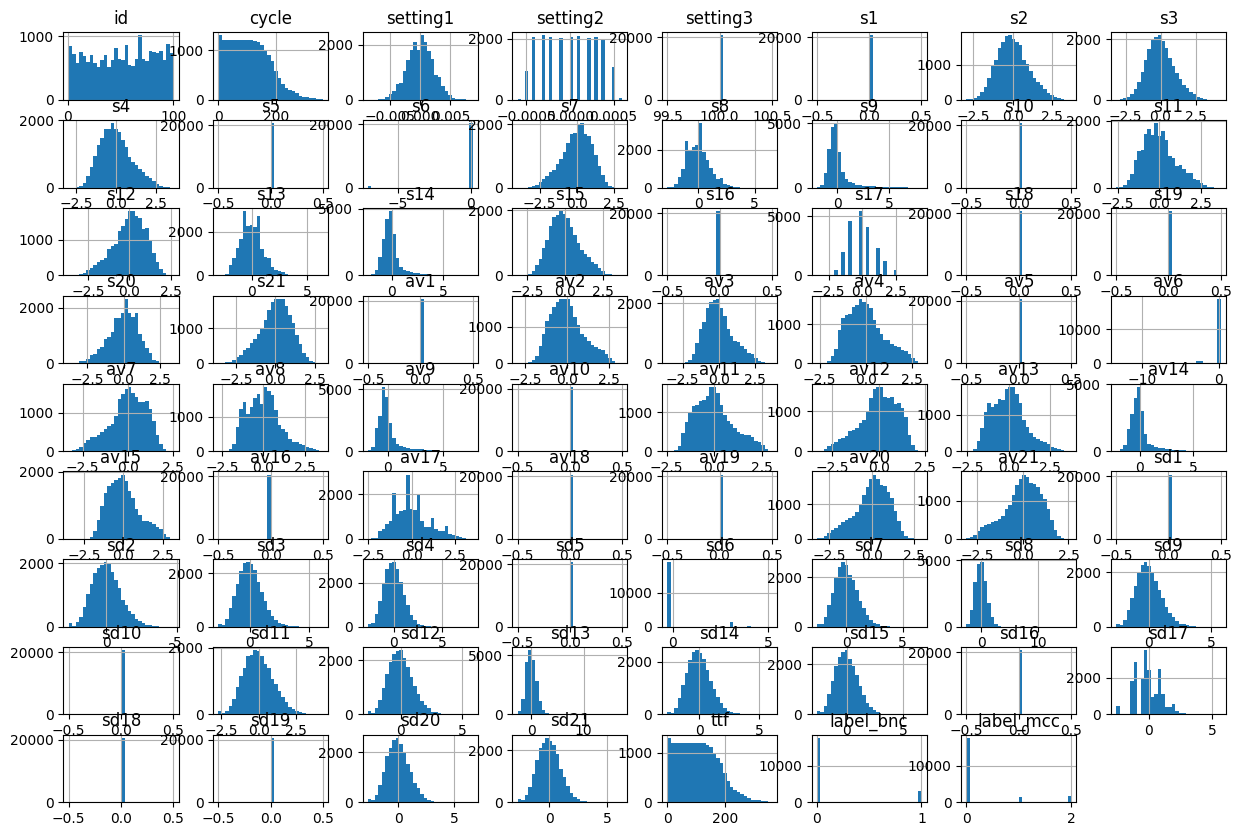

In [53]:
# Normalisasi kolom sensor, av, dan sd
# Mengambil hanya fitur-fitur numerik
# StandarScaler adalah teknik normalisasi dalam sklearn untuk menstandarisasi fitur dngan
# menghilangkan mean dan menskalakan varians unit
numerical_features = dataset_cleaned.select_dtypes(include=[np.number]).columns
scaler = StandardScaler() 
features_to_scale = [f's{i}' for i in range(1, 22)] + [f'av{i}' for i in range(1, 22)] + [f'sd{i}' for i in range(1, 22)]
dataset_cleaned[features_to_scale] = scaler.fit_transform(dataset_cleaned[features_to_scale])
dataset_cleaned[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()

In [54]:
# Memisahkan fitur dan target
X_features = dataset_cleaned.drop(columns=['id', 'ttf', 'label_bnc', 'label_mcc'])
y_target_ttf = dataset_cleaned['ttf']

In [55]:
# Membagi data menjadi training dan testing set
X_train_set, X_test_set, y_train_ttf, y_test_ttf = train_test_split(X_features, y_target_ttf, test_size=0.2, random_state=42)

# Membangun Model Estimasi TTF dengan Gradient Boosting
# Salah satu algoritma Estimasi dengan akurasi yang tinggi, dan kemampuan menangani berbagai jenis data
model_ttf = GradientBoostingRegressor(random_state=42)
model_ttf.fit(X_train_set, y_train_ttf)

GradientBoostingRegressor(random_state=42)

In [56]:
# Memprediksi TTF untuk data testing
predicted_ttf = model_ttf.predict(X_test_set)

# Evaluasi model menggunakan Root Mean Squared Error (RMSE)
mean_sq_error = mean_squared_error(y_test_ttf, predicted_ttf)
root_mean_sq_error = np.sqrt(mean_sq_error)
print(f'Root Mean Squared Error untuk TTF: {root_mean_sq_error}')

Root Mean Squared Error untuk TTF: 33.1945227773292


In [57]:
# Memprediksi TTF untuk seluruh data
all_predicted_ttf = model_ttf.predict(X_features)

# Menentukan apakah pesawat perlu perawatan berdasarkan TTF prediksi
for idx, pred in enumerate(all_predicted_ttf):
    if pred <= 100:
        print(f'Pesawat dengan id {dataset_cleaned.iloc[idx]["id"]} perlu perawatan!')
    else:
        print(f'Pesawat dengan id {dataset_cleaned.iloc[idx]["id"]} dalam kondisi baik.')

Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondisi baik.
Pesawat dengan id 1.0 dalam kondis

In [ ]:
# Menentukan label aktual untuk data testing
y_actual_labels = [1 if val <= 100 else 0 for val in y_test_ttf]

# Menentukan label prediksi berdasarkan nilai TTF
y_pred_labels = [1 if pred <= 100 else 0 for pred in predicted_ttf]

In [ ]:
# Menghitung akurasi prediksi
prediction_accuracy = accuracy_score(y_actual_labels, y_pred_labels)
print(f'Akurasi: {prediction_accuracy:.3f}')

# Menghitung akurasi dalam persen
accuracy_percent = prediction_accuracy * 100
print(f'Akurasi: {accuracy_percent:.2f}%')

In [ ]:
# Menghitung classification report
classif_report = classification_report(y_actual_labels, y_pred_labels)
print('Classification Report:')
print(classif_report)

# Menghitung confusion matrix
# membandingkan hasil prediksi model dengan nilai sebenarnya dari data yang diuji
confusion_mat = confusion_matrix(y_actual_labels, y_pred_labels)
print('Confusion Matrix:')
print(confusion_mat)

In [ ]:
# Visualisasi Classification Report dan Confusion Matrix 
plt.figure(figsize=(10, 6))

# Visualisasi Classification Report
plt.subplot(1, 2, 2)
report_values = [classif_report.split('\n')[2].split(' ')[-1], classif_report.split('\n')[3].split(' ')[-1], classif_report.split('\n')[4].split(' ')[-1]]
sns.barplot(x=['Precision', 'Recall', 'F1-score'], y=report_values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Classification Report')

# Visualisasi Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Visualisasi distribusi data untuk semua kolom

for column in dataset_cleaned.columns:
    if column not in ['id', 'ttf', 'label_bnc', 'label_mcc']:
        plt.figure(figsize=(10, 6))
        sns.histplot(dataset_cleaned[column], bins=50, kde=True)
        plt.title(f'Distribusi {column}')
        plt.xlabel(column)
        plt.ylabel('Frekuensi')
        plt.show()